In [4]:
%matplotlib inline
import networkx as nx
import matplotlib as plt

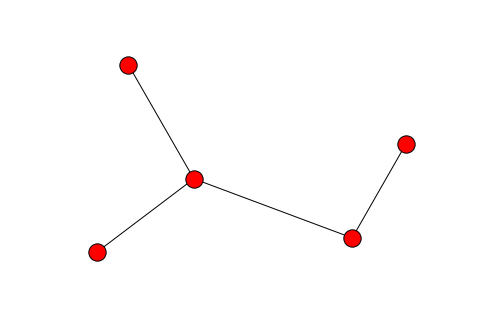

In [58]:
G0 = nx.random_lobster(5, 0.5, 0.5)
ingraph_nnodes = len(G0.nodes())
ingraph_edges = G0.edges()
nx.draw(G0)

In [101]:
class cut_finder(object):
    def __init__(self, in_nodes, ingraph_edges):
        G = nx.Graph()
        G.add_nodes_from(range(2*ingraph_nnodes))

        for i in range(ingraph_nnodes):
            G.add_edge(2*i, 2*i+1)

        for v1, v2 in ingraph_edges:
            G.add_edge(v1*2+1, v2*2) 
        
        self.G = G
        self.in_nodes = in_nodes
        self.in_edges = set(ingraph_edges)
        self.capacity_edges = [(2*i, 2*i+1) for i in range(ingraph_nnodes)]  
        
    def update_capacities(self, ingraph_capacities):
        edge_capacities = dict(zip(self.capacity_edges, node_capacities))
        nx.set_edge_attributes(self.G, 'capacity', edge_capacities)        
    
    def find_cutset(self, in1, in2):
        _, (reachable, non_reachable) = nx.minimum_cut(self.G, in1*2+1, in2*2)
        cutset = set()
        for u, nbrs in ((n, self.G[n]) for n in reachable):
            cutset.update((u, v) for v in nbrs if v in non_reachable)
        return [i//2 for (i, _) in cutset]
    
    def get_cutsets(self, ingraph_capacities):
        self.update_capacities(ingraph_capacities)
        
        cutsets = []
        for in1 in range(self.in_nodes):
            for in2 in range(in1+1, self.in_nodes):
                if (in1, in2) in self.in_edges: continue
                cutset = self.find_cutset(in1, in2)
                cut_csum = sum(ingraph_capacities[i] for i in cutset)
                if cut_csum < ingraph_capacities[in1] + ingraph_capacities[in2] -1:
                    cutsets.append(((in1, in2), cutset))
        return cutsets

In [98]:
G0.edges()

[(0, 1), (1, 2), (1, 4), (2, 3)]

In [102]:
cf = cut_finder(len(G0.nodes()), G0.edges())
node_capacities = [random.random() for i in range(len(G0.nodes()))]
cf.get_cutsets(node_capacities)

[((0, 2), [1])]